In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image

from util import *
from kernels import *
import metrics
import data_loader
import model

In [3]:
f = cv2.imread("images/synthetic_source/01.jpeg")
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY).astype(np.float64)
f /= 255.0

plt.figure(figsize = (8,8))
plt.gray()
plt.imshow(f)

[ WARN:0@1.218] global loadsave.cpp:241 findDecoder imread_('images/synthetic_source/01.jpeg'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


256 256


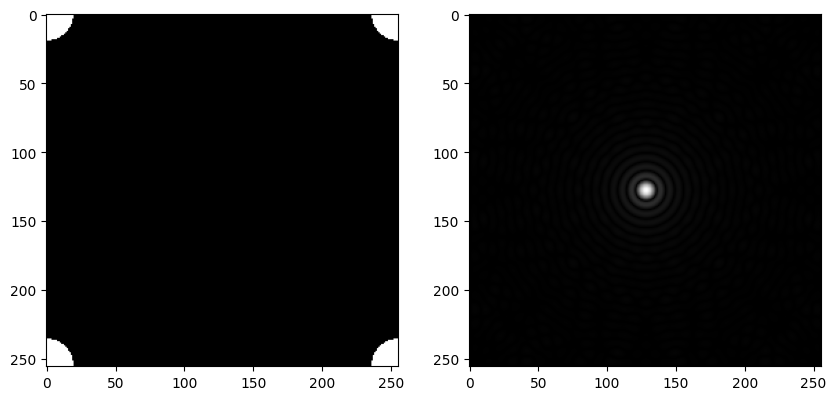

In [ ]:
h = np.fft.fftshift(circle_parametric_kernel(20))
n = np.zeros((1,1))
g = degrade_image(f,h,n)

show_original_with_ff(h)

total difference 2593.8652631839664
3


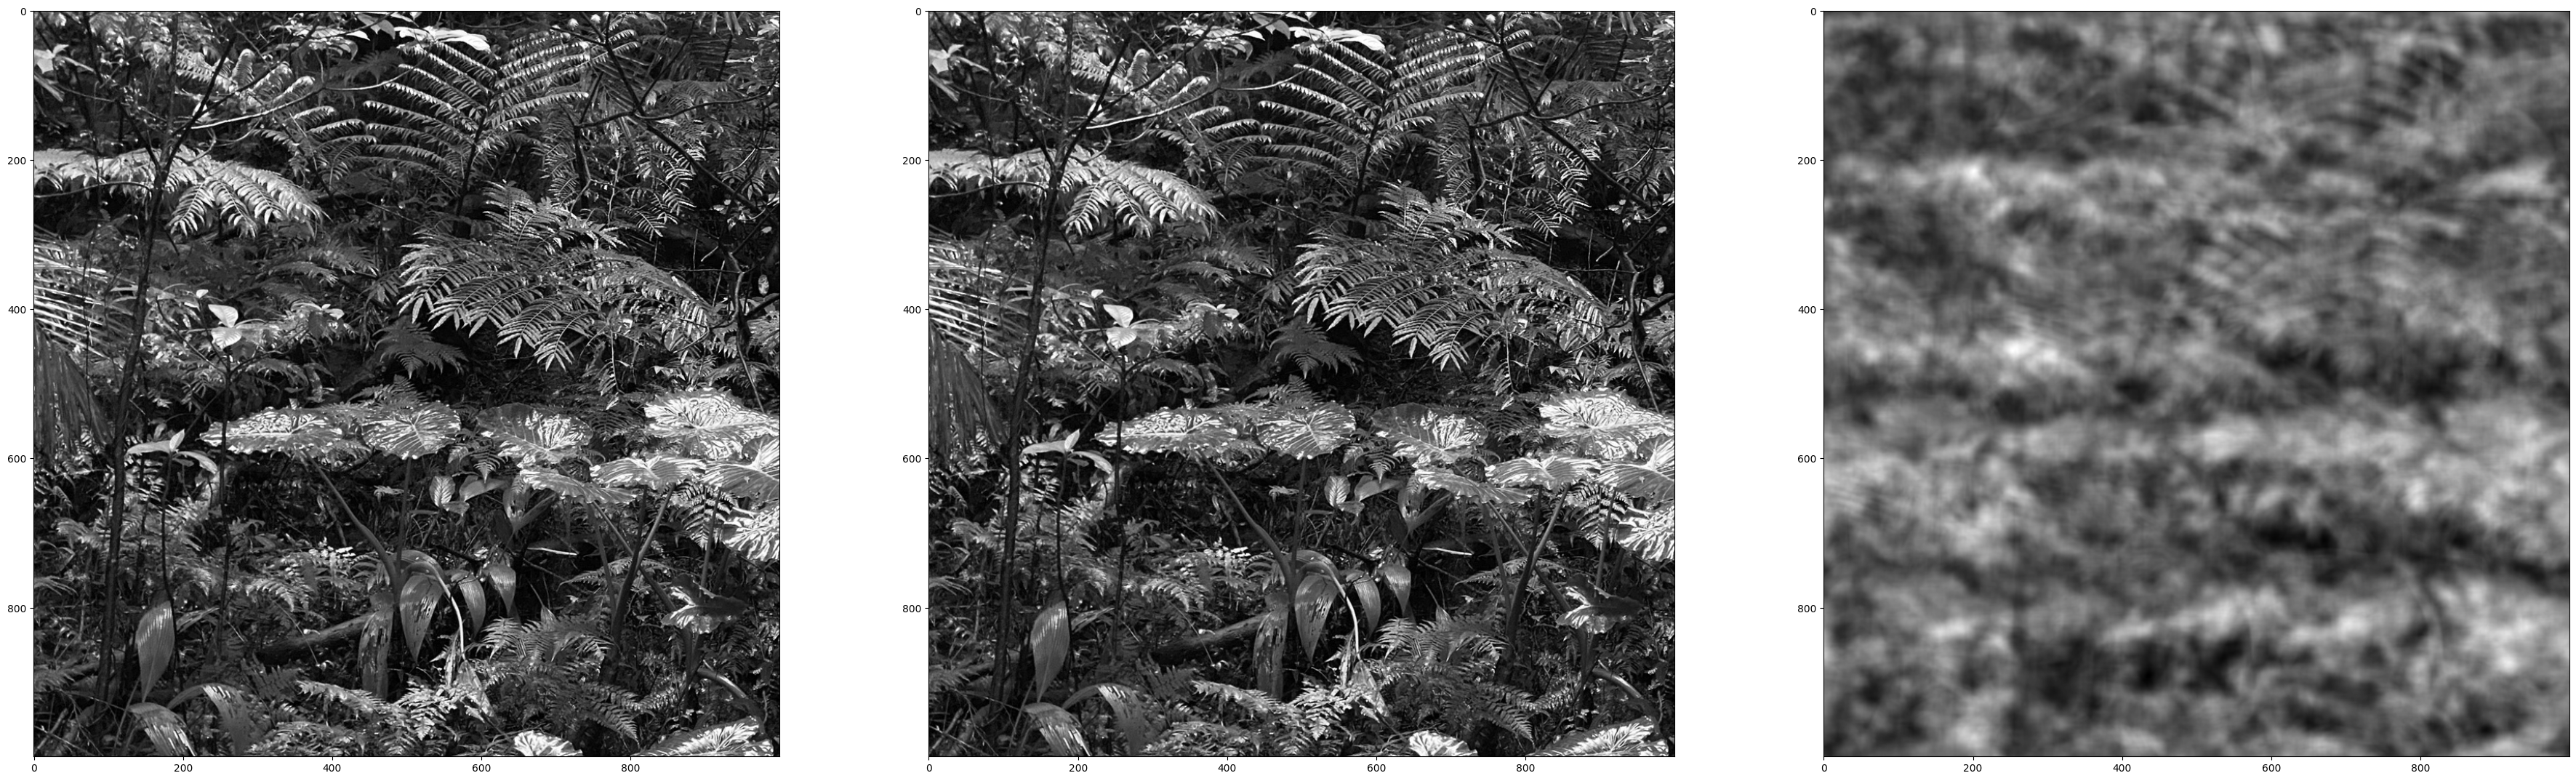

In [ ]:
f_reconstructed = wiener_filter(g, h, n)

print("total difference", np.sum(np.sqrt((f - f_reconstructed) ** 2)))

plot_images(
    [f, f_reconstructed, g]
)

# The model

In [12]:
def visualize_batch(batch, num_samples=4):
    """
    Utility function to visualize a batch of data
    
    Args:
        batch (dict): Batch from the data loader
        num_samples (int): Number of samples to visualize
    """
    import matplotlib.pyplot as plt
    
    blurred_images = batch['blurred_image'][:num_samples]
    kernels = batch['kernel'][:num_samples]
    names = batch['image_name'][:num_samples]
    
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    
    for i in range(num_samples):
        # Plot blurred image
        axes[0, i].imshow(blurred_images[i].squeeze(), cmap='gray')
        axes[0, i].set_title(f'Image: {names[i]}')
        axes[0, i].axis('off')
        
        # Plot kernel
        axes[1, i].imshow(kernels[i], cmap='viridis')
        axes[1, i].set_title('Kernel')
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [13]:
batch_size = 2

train_loader, val_loader = data_loader.create_data_loaders(
    batch_size=batch_size,
)

init 104


In [14]:
kernel_model = model.KernelEstimationNet(256, 256)

In [15]:
model.train_model(kernel_model, train_loader, 10, device='cpu')

Epoch 0, Batch 0, Loss: 0.00000052
Epoch 0, Batch 1, Loss: 0.00000025


/Users/jakubzika/School/Magistr/5.semestr/ComputerVision/ComputerVision2024/CV2024_final_project/data_loader.py:49: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  kernel_tensor = torch.from_numpy(kernel).float()
/Users/jakubzika/School/Magistr/5.semestr/ComputerVision/ComputerVision2024/CV2024_final_project/data_loader.py:49: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  kernel_tensor = torch.from_numpy(kernel).float()


Epoch 0, Batch 2, Loss: 0.00000039
Epoch 0, Batch 3, Loss: 0.00000018
Epoch 0, Batch 4, Loss: 0.00000028
Epoch 0, Batch 5, Loss: 0.00000144
Epoch 0, Batch 6, Loss: 0.00000156
Epoch 0, Batch 7, Loss: 0.00000064
Epoch 0, Batch 8, Loss: 0.00000043
Epoch 0, Batch 9, Loss: 0.00000012
Epoch 0, Batch 10, Loss: 0.00000054
Epoch 0, Batch 11, Loss: 0.00000033


/Users/jakubzika/School/Magistr/5.semestr/ComputerVision/ComputerVision2024/CV2024_final_project/data_loader.py:49: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  kernel_tensor = torch.from_numpy(kernel).float()


Epoch 0, Batch 12, Loss: 0.00000004
Epoch 0, Batch 13, Loss: 0.00000025
Epoch 0, Batch 14, Loss: 0.00000090
Epoch 0, Batch 15, Loss: 0.00000004


/Users/jakubzika/School/Magistr/5.semestr/ComputerVision/ComputerVision2024/CV2024_final_project/data_loader.py:49: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  kernel_tensor = torch.from_numpy(kernel).float()


Epoch 0, Batch 16, Loss: 0.00000035
Epoch 0, Batch 17, Loss: 0.00000021
Epoch 0, Batch 18, Loss: 0.00000053
Epoch 0, Batch 19, Loss: 0.00000186
Epoch 0, Batch 20, Loss: 0.00000008
Epoch 0, Batch 21, Loss: 0.00000014
Epoch 0, Batch 22, Loss: 0.00000010
Epoch 0, Batch 23, Loss: 0.00000003
Epoch 0, Batch 24, Loss: 0.00000005
Epoch 0, Batch 25, Loss: 0.00000021
Epoch 0, Batch 26, Loss: 0.00000021
Epoch 0, Batch 27, Loss: 0.00000027
Epoch 0, Batch 28, Loss: 0.00000080
Epoch 0, Batch 29, Loss: 0.00000057
Epoch 0, Batch 30, Loss: 0.00000003
Epoch 0, Batch 31, Loss: 0.00000027
Epoch 0, Batch 32, Loss: 0.00000044
Epoch 0, Batch 33, Loss: 0.00000001
Epoch 0, Batch 34, Loss: 0.00000019
Epoch 0, Batch 35, Loss: 0.00000082
Epoch 0, Batch 36, Loss: 0.00000043
Epoch 0, Batch 37, Loss: 0.00000003
Epoch 0, Batch 38, Loss: 0.00000036
Epoch 0, Batch 39, Loss: 0.00000006
Epoch 0, Batch 40, Loss: 0.00000051


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1024])